## Action Recognition Model Training & Testing

In [1]:
import os
from constants import *
import numpy as np

In [2]:
from files_io import readActionLabels, readActionMapping

action_labels = readActionLabels()
action_labels

{'0': 'hello',
 '1': 'good/thank you',
 '2': 'help',
 '3': 'I/me',
 '4': 'please',
 '5': 'sorry',
 '6': 'welcome',
 '7': 'welcome',
 '8': 'ok',
 '9': 'what',
 '10': 'what',
 '11': 'can',
 '12': 'thank you very much',
 '13': 'deaf',
 '14': 'do not',
 '15': 'feel',
 '16': 'eat/food',
 '17': 'eat a lot',
 '18': 'tired',
 '19': 'because',
 '20': 'sick',
 '21': 'drink',
 '22': 'drink',
 '23': 'apple',
 '24': 'banana',
 '25': 'drive',
 '26': 'again',
 '27': 'also',
 '28': 'ask',
 '29': 'yes',
 '30': 'no',
 '31': 'man',
 '32': 'man',
 '33': 'woman',
 '34': 'woman',
 '35': 'he/she',
 '36': 'bad',
 '37': 'have/has/had',
 '38': 'have/has/had',
 '39': 'when',
 '40': 'where',
 '41': 'which',
 '42': 'who',
 '43': 'why',
 '44': 'how',
 '45': 'you',
 '46': 'boy',
 '47': 'girl',
 '48': 'friend',
 '49': 'finish/complete',
 '50': 'find',
 '51': 'other',
 '52': 'forget',
 '53': 'give',
 '54': 'give you',
 '55': 'give me',
 '56': 'go',
 '57': 'get',
 '58': 'understand/comprehend',
 '59': 'use',
 '60': 'wi

In [3]:
action_mapping = readActionMapping()
action_mapping

{'hello': '0',
 'good/thank you': '1',
 'help': '2',
 'I/me': '3',
 'please': '4',
 'sorry': '5',
 'welcome': '7',
 'ok': '8',
 'what': '10',
 'can': '11',
 'thank you very much': '12',
 'deaf': '13',
 'do not': '14',
 'feel': '15',
 'eat/food': '16',
 'eat a lot': '17',
 'tired': '18',
 'because': '19',
 'sick': '20',
 'drink': '22',
 'apple': '23',
 'banana': '24',
 'drive': '25',
 'again': '26',
 'also': '27',
 'ask': '28',
 'yes': '29',
 'no': '30',
 'man': '32',
 'woman': '34',
 'he/she': '35',
 'bad': '36',
 'have/has/had': '38',
 'when': '39',
 'where': '40',
 'which': '41',
 'who': '42',
 'why': '43',
 'how': '44',
 'you': '45',
 'boy': '46',
 'girl': '47',
 'friend': '48',
 'finish/complete': '49',
 'find': '50',
 'other': '51',
 'forget': '52',
 'give': '53',
 'give you': '54',
 'give me': '55',
 'go': '56',
 'get': '57',
 'understand/comprehend': '58',
 'use': '59',
 'will': '60',
 'with': '61',
 'wait': '62',
 'work': '63',
 'they': '64',
 'their': '65',
 'school': '66',
 '

### 1. Preprocess Data

In [4]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [5]:
features, labels = [], []

for action in action_labels:
    folderName = (action + "," + action_labels[action]).replace("/", "_")
    for npyFile in os.listdir(os.path.join(KEYPOINTS_PATH, folderName)):
        load_data = np.load(os.path.join(KEYPOINTS_PATH, folderName, npyFile))
        features.extend(load_data)
        labels.extend(np.full((load_data.shape[0], 1), int(action), dtype=int))


In [6]:
len(features)

12100

In [7]:
len(labels)

12100

In [8]:
X = np.array(features)
X.shape

(12100, 20, 240)

In [9]:
y = to_categorical(labels).astype(int)
y.shape

(12100, 121)

In [10]:
X.nbytes

464640000

In [11]:
y.nbytes

5856400

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9075, 20, 240)
(3025, 20, 240)
(9075, 121)
(3025, 121)


2. Model Compiling

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard

In [15]:
LOG_PATH = os.path.join("log")
tb_callback = TensorBoard(log_dir=LOG_PATH)

In [31]:
modelInputSize = (X.shape[1], X.shape[2])
modelInputSize

(20, 240)

In [32]:
model = Sequential()
model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=modelInputSize))
model.add(LSTM(units=256, activation='relu', return_sequences=True))
model.add(LSTM(units=256, activation='relu', return_sequences=False))
model.add(Dense(units=128, activation='relu'))
# model.add(Dropout)
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=y.shape[1], activation='softmax'))


In [20]:
# model = Sequential()
# model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputSize))
# model.add(LSTM(units=128, activation='relu', return_sequences=True))
# model.add(LSTM(units=64, activation='relu', return_sequences=False))
# model.add(Dense(units=64, activation='relu'))
# # model.add(Dropout)
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=y.shape[1], activation='softmax'))


In [33]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

3. Model Training

In [34]:
model.fit(X_train, y_train, epochs=30, callbacks=[tb_callback])

Epoch 1/30
284/284 [==============================] - 37s 115ms/step - loss: 4.0670 - categorical_accuracy: 0.0542
Epoch 2/30
284/284 [==============================] - 33s 118ms/step - loss: 2.5688 - categorical_accuracy: 0.2513
Epoch 3/30
284/284 [==============================] - 32s 114ms/step - loss: 1.7438 - categorical_accuracy: 0.4551
Epoch 4/30
284/284 [==============================] - 32s 112ms/step - loss: 1.2831 - categorical_accuracy: 0.5878
Epoch 5/30
284/284 [==============================] - 35s 122ms/step - loss: 0.9282 - categorical_accuracy: 0.6980
Epoch 6/30
284/284 [==============================] - 32s 112ms/step - loss: 0.7365 - categorical_accuracy: 0.7563
Epoch 7/30
284/284 [==============================] - 30s 106ms/step - loss: 0.5663 - categorical_accuracy: 0.8104
Epoch 8/30
284/284 [==============================] - 31s 108ms/step - loss: 0.4604 - categorical_accuracy: 0.8488
Epoch 9/30
284/284 [==============================] - 30s 106ms/step - loss: 0.3

KeyboardInterrupt: 

In [ ]:
MODEL_PATH = os.path.join("../action-recognition/models")
model.load_weights(os.path.join(MODEL_PATH, 'model_1.h5'))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 20, 128)           188928    
                                                                 
 lstm_10 (LSTM)              (None, 20, 256)           394240    
                                                                 
 lstm_11 (LSTM)              (None, 256)               525312    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 121)               15609     
                                                                 
Total params: 1,173,497
Trainable params: 1,173,497
No

4. Model Testing

In [36]:
test_results = model.predict(X_test)

95/95 [==============================] - 4s 40ms/step


In [37]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [38]:
y_actual = np.argmax(y_test, axis=1)
y_predict = np.argmax(test_results, axis=1)

In [39]:
accuracy_score(y_actual, y_predict)

0.9120661157024793

In [40]:
multilabel_confusion_matrix(y_actual, y_predict)

array([[[2997,    1],
        [   0,   27]],

       [[2997,    3],
        [   2,   23]],

       [[2987,    7],
        [   1,   30]],

       [[2993,    6],
        [   1,   25]],

       [[2991,    3],
        [  13,   18]],

       [[2998,    2],
        [   3,   22]],

       [[3006,    0],
        [   3,   16]],

       [[3004,    1],
        [   0,   20]],

       [[2991,    9],
        [   4,   21]],

       [[3004,    1],
        [   5,   15]],

       [[2989,    3],
        [   1,   32]],

       [[3001,    0],
        [   1,   23]],

       [[2997,    2],
        [   0,   26]],

       [[2996,    4],
        [   5,   20]],

       [[2989,    2],
        [   3,   31]],

       [[3000,    2],
        [   5,   18]],

       [[3004,    1],
        [   1,   19]],

       [[2992,    3],
        [   0,   30]],

       [[2994,    0],
        [   1,   30]],

       [[2995,    1],
        [   1,   28]],

       [[2996,    7],
        [   0,   22]],

       [[2994,    0],
        [   

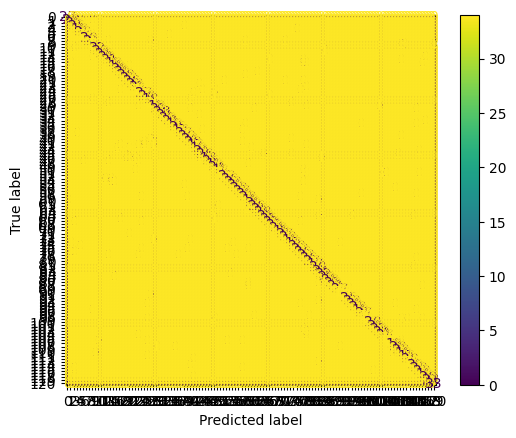

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_actual, y_predict)
cmDisp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmDisp.plot()
plt.show()

5. Saving Model Weights

In [42]:
MODEL_PATH = os.path.join("../action-recognition/models")

In [43]:
model.save(os.path.join(MODEL_PATH, "model_v2_1.h5"))